In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape #to know the number of column and rows in the data

(891, 12)

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/home/subhash/miniconda3/envs/deepl/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


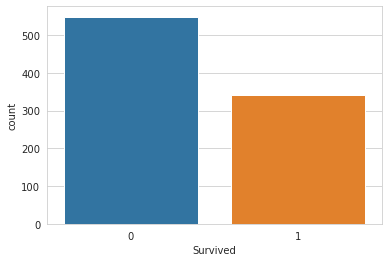

In [8]:
sns.countplot(train['Survived'])
plt.show()

/home/subhash/miniconda3/envs/deepl/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/subhash/miniconda3/envs/deepl/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/subhash/miniconda3/envs/deepl/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

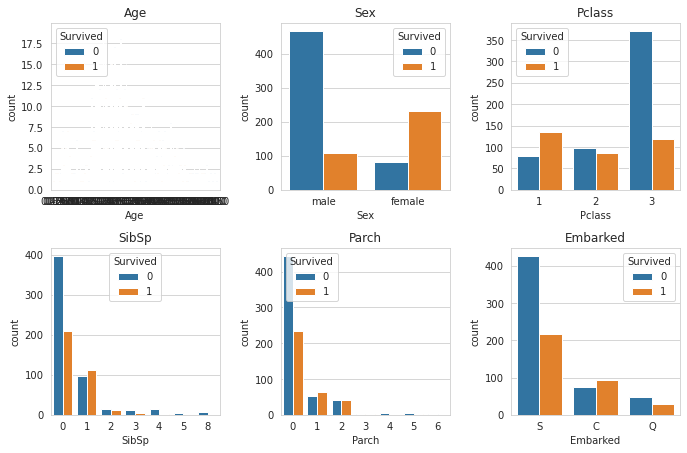

In [9]:
cols = ['Age','Sex','Pclass','SibSp','Parch','Embarked']
n_rows = 2
n_cols = 3

#the subplot grid and the size of each plot
fig,axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 3.2, n_rows * 3.2))

for r in range(0,n_rows):
    for j in range(0,n_cols):
        i = r*n_cols + j #to make an index from 0 to 5
        ax = axs[r][j] #positioning the subplot
        sns.countplot(train[cols[i]], hue = train['Survived'],ax = ax)
        ax.set_title(cols[i])
        ax.legend(title = 'Survived', loc = 'best')
    

plt.tight_layout()

In [10]:
train.pivot_table('Survived', index = 'Sex',columns = 'Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


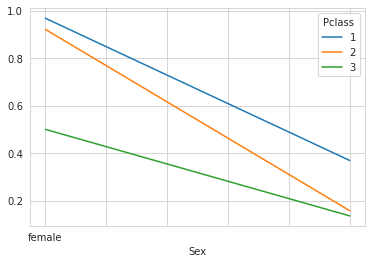

In [11]:
train.pivot_table('Survived', index = 'Sex',columns = 'Pclass').plot()
plt.show()

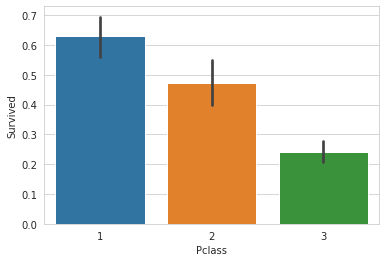

In [12]:
sns.barplot(x='Pclass', y='Survived', data = train)
plt.show()

In [13]:
age = pd.cut(train['Age'],[0,18,80])
train.pivot_table('Survived', ['Sex',age],'Pclass')


Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

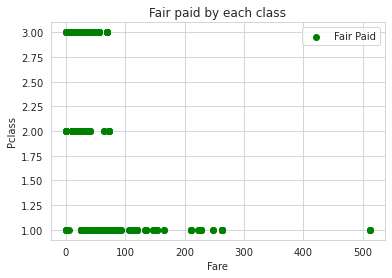

In [14]:
plt.scatter(train['Fare'], train['Pclass'], color = 'green', label = 'Fair Paid')
plt.xlabel('Fare')
plt.ylabel('Pclass')
plt.title('Fair paid by each class')
plt.legend()
plt.show()

In [15]:
#preprocessing
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
for val in train:
    print(train[val].value_counts)
    print()

<bound method IndexOpsMixin.value_counts of 0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64>

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

<bound method IndexOpsMixin.value_counts of 0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64>

<bound method IndexOpsMixin.value_counts of 0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                           

In [17]:
#deleting missing value
titanic = train.dropna(subset = ['Embarked','Age'])
test1 = test.dropna(subset = ['Embarked','Age'])

In [18]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
test1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C


In [20]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [21]:
titanic['Sex'] = titanic['Sex'].map({'male':1,'female':0})

/tmp/ipykernel_9527/3102327357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Sex'] = titanic['Sex'].map({'male':1,'female':0})


In [22]:
test1['Sex'] = test1['Sex'].map({'male':1,'female':0})

/tmp/ipykernel_9527/2791164247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['Sex'] = test1['Sex'].map({'male':1,'female':0})


In [23]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C


In [24]:
titanic1 = titanic.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)
test1 = test1.drop(['Name','Ticket','Cabin'], axis = 1)



In [25]:
test1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,Q
1,893,3,0,47.0,1,0,7.0000,S
2,894,2,1,62.0,0,0,9.6875,Q
3,895,3,1,27.0,0,0,8.6625,S
4,896,3,0,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
409,1301,3,0,3.0,1,1,13.7750,S
411,1303,1,0,37.0,1,0,90.0000,Q
412,1304,3,0,28.0,0,0,7.7750,S
414,1306,1,0,39.0,0,0,108.9000,C


In [26]:
titanic1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,Q
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
889,1,1,1,26.0,0,0,30.0000,C


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
labelencoder = LabelEncoder()

In [29]:
titanic1.iloc[:,7] = labelencoder.fit_transform(titanic1.iloc[:,7])

In [30]:
test1['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [31]:
test1['Embarked']= test1['Embarked'].map({'Q':1,'S':0,'C':2})

In [32]:
titanic1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
889,1,1,1,26.0,0,0,30.0000,0


In [33]:
test1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,0
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,0
4,896,3,0,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
409,1301,3,0,3.0,1,1,13.7750,0
411,1303,1,0,37.0,1,0,90.0000,1
412,1304,3,0,28.0,0,0,7.7750,0
414,1306,1,0,39.0,0,0,108.9000,2


In [34]:
test1.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [35]:

print(titanic1['Embarked'].unique())
print(titanic1['Sex'].unique())

[2 0 1]
[1 0]


In [36]:
titanic1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [37]:
titanic1.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [38]:
X = titanic1.iloc[:,1:8].values
y = titanic1.iloc[:,0].values

In [39]:
X

array([[ 3.    ,  1.    , 22.    , ...,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  0.    , 38.    , ...,  0.    , 71.2833,  0.    ],
       [ 3.    ,  0.    , 26.    , ...,  0.    ,  7.925 ,  2.    ],
       ...,
       [ 1.    ,  0.    , 19.    , ...,  0.    , 30.    ,  2.    ],
       [ 1.    ,  1.    , 26.    , ...,  0.    , 30.    ,  0.    ],
       [ 3.    ,  1.    , 32.    , ...,  0.    ,  7.75  ,  1.    ]])

In [40]:
y

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [41]:
#training the model
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size = .2, random_state = 0)

In [42]:
  #scaling the data
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)


In [43]:
X_train

array([[-1.49280291,  0.7475989 ,  0.11755613, ..., -0.50386115,
         0.26128855,  0.53057164],
       [-1.49280291,  0.7475989 ,  0.60758867, ...,  0.62486718,
         2.10276281,  0.53057164],
       [-0.30316025,  0.7475989 ,  0.39757473, ..., -0.50386115,
        -0.17679857,  0.53057164],
       ...,
       [-0.30316025,  0.7475989 , -0.93251358, ..., -0.50386115,
        -0.17679857,  0.53057164],
       [-0.30316025,  0.7475989 ,  0.67759332, ..., -0.50386115,
        -0.17679857,  0.53057164],
       [ 0.8864824 , -1.33761567, -0.3724764 , ...,  2.88232383,
        -0.2973683 , -1.99574857]])

In [44]:
#using different machine learning models
def model(X_train,Y_train):
    
    #logreg
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train,Y_train)
    
    #Kneighbors
    from sklearn.neighbors import KNeighborsClassifier
    kn = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p=2)
    kn.fit(X_train,Y_train)
    
    #SVC(linear kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state=0)
    svc_lin.fit(X_train,Y_train)
    
    #SVC (RBF)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel= 'rbf', random_state = 0)
    svc_rbf.fit(X_train,Y_train)
    
    #GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train,Y_train)
    
    #decision tree
    from sklearn.tree import DecisionTreeClassifier
    dec = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    dec.fit(X_train,Y_train)
    
    #random forest
    from sklearn.ensemble import RandomForestClassifier
    fore = RandomForestClassifier(n_estimators = 12, criterion = 'entropy', random_state = 0)
    fore = fore.fit(X_train,Y_train)
    
    print('[0]logistic regression training accuracy: ',log.score(X_train,Y_train))
    print('[1]kneighbors training accuracy: ',kn.score(X_train,Y_train))
    print('[2]linear kernel training accuracy: ',svc_lin.score(X_train,Y_train))
    print('[3]rbf training accuracy: ',svc_rbf.score(X_train,Y_train))
    print('[4]GaussianNB training accuracy: ',gauss.score(X_train,Y_train))
    print('[5]Decision tree training accuracy: ',dec.score(X_train,Y_train))
    print('[6]random forest training accuracy: ',fore.score(X_train,Y_train))
    
    
    
    return log, kn, svc_lin, svc_rbf, gauss, dec, fore
    
    

In [45]:
model = model(X_train,Y_train)

[0]logistic regression training accuracy:  0.7978910369068541
[1]kneighbors training accuracy:  0.8506151142355008
[2]linear kernel training accuracy:  0.7768014059753954
[3]rbf training accuracy:  0.8506151142355008
[4]GaussianNB training accuracy:  0.8031634446397188
[5]Decision tree training accuracy:  0.9929701230228472
[6]random forest training accuracy:  0.9736379613356766


In [46]:
#testing the data

In [47]:
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    
    test_score = (TP + TN)/( TN + FP + FN + TP)
    
    print(cm)
    print('model[{}] testing accuracy = "{}"' .format(i,test_score))
    print()

[[75  7]
 [19 42]]
model[0] testing accuracy = "0.8181818181818182"

[[69 13]
 [17 44]]
model[1] testing accuracy = "0.7902097902097902"

[[70 12]
 [18 43]]
model[2] testing accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
model[3] testing accuracy = "0.7972027972027972"

[[69 13]
 [27 34]]
model[4] testing accuracy = "0.7202797202797203"

[[54 28]
 [12 49]]
model[5] testing accuracy = "0.7202797202797203"

[[75  7]
 [15 46]]
model[6] testing accuracy = "0.8461538461538461"



In [48]:
#finding feature importance

forest = model[6]
importances = pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Name,0.300
SibSp,0.286
Pclass,0.189
Survived,0.096
Sex,0.053
Age,0.043
Parch,0.033


<AxesSubplot:xlabel='feature'>

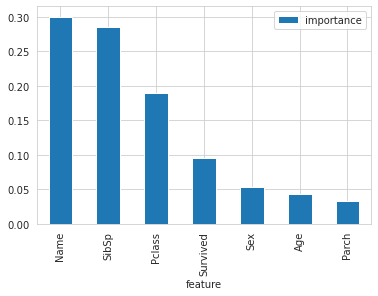

In [49]:
importances.plot.bar()


In [50]:
#predicting the model
pred = model[6].predict(X_test)
print(pred)

print()

print(Y_test)

[0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [51]:
test_data = test1.iloc[:,0:7].values
test_data

array([[8.9200e+02, 3.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        7.8292e+00],
       [8.9300e+02, 3.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        7.0000e+00],
       [8.9400e+02, 2.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        9.6875e+00],
       ...,
       [1.3040e+03, 3.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        7.7750e+00],
       [1.3060e+03, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0890e+02],
       [1.3070e+03, 3.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        7.2500e+00]])

In [52]:

my_survival = [[1,0,21,0,0,500,0]]

from sklearn.preprocessing import StandardScaler
st = StandardScaler()
scaled = st.fit_transform(my_survival)

will_I_survive = model[6].predict(scaled)

In [53]:
print(will_I_survive)

if will_I_survive == 0:
    print('No, you are dead')
else:
    print('Yes, you made it')

[0]
No, you are dead


In [54]:
train.shape

(891, 12)

In [55]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [79]:
test1.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [80]:
test4 = test1.dropna()

In [89]:
test4

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,0
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,0
4,896,3,0,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
409,1301,3,0,3.0,1,1,13.7750,0
411,1303,1,0,37.0,1,0,90.0000,1
412,1304,3,0,28.0,0,0,7.7750,0
414,1306,1,0,39.0,0,0,108.9000,2


In [81]:
test4.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [82]:
test4.shape

(331, 8)

In [83]:
testing = test4.iloc[:,1:8].values

In [84]:
testing

array([[  3.    ,   1.    ,  34.5   , ...,   0.    ,   7.8292,   1.    ],
       [  3.    ,   0.    ,  47.    , ...,   0.    ,   7.    ,   0.    ],
       [  2.    ,   1.    ,  62.    , ...,   0.    ,   9.6875,   1.    ],
       ...,
       [  3.    ,   0.    ,  28.    , ...,   0.    ,   7.775 ,   0.    ],
       [  1.    ,   0.    ,  39.    , ...,   0.    , 108.9   ,   2.    ],
       [  3.    ,   1.    ,  38.5   , ...,   0.    ,   7.25  ,   0.    ]])

In [85]:
from sklearn.preprocessing import StandardScaler
si = StandardScaler()
test2 = si.fit_transform(testing)

In [86]:
test2

array([[ 1.01542612,  0.78901776,  0.30665727, ..., -0.49211953,
        -0.54228095,  0.50868113],
       [ 1.01542612, -1.2673986 ,  1.19423645, ..., -0.49211953,
        -0.55584416, -0.6525151 ],
       [-0.16804587,  0.78901776,  2.25933148, ..., -0.49211953,
        -0.51188479,  0.50868113],
       ...,
       [ 1.01542612, -1.2673986 , -0.15488391, ..., -0.49211953,
        -0.5431675 , -0.6525151 ],
       [-1.35151786, -1.2673986 ,  0.62618578, ..., -0.49211953,
         1.11093161,  1.66987736],
       [ 1.01542612,  0.78901776,  0.59068261, ..., -0.49211953,
        -0.55175491, -0.6525151 ]])

In [90]:

ids = test4['PassengerId']
predictions = model[6].predict(test2)

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)


